<a href="https://colab.research.google.com/github/daurice/hyper_parameter-tuning/blob/main/Hyper_parameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Clustering and hyper param tunning/car_data_v2.csv')

In [15]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


In [17]:
df.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2.119000e+03
mean,6.153374,42207.621992,22.574856,61.802931,5.002832,3.287744e+05
std,3.524845,27950.561196,3.008683,13.112960,0.176503,1.496699e+05
min,0.000000,581.000000,14.400000,38.400000,4.000000,4.000000e+04
25%,4.000000,21000.000000,20.510000,53.260000,5.000000,2.490000e+05
50%,5.000000,38000.000000,22.740000,67.000000,5.000000,3.150000e+05
75%,8.000000,58494.000000,23.950000,67.050000,5.000000,3.900000e+05
max,29.000000,425785.000000,33.540000,123.370000,7.000000,1.240000e+06


In [18]:
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
mileage,0
max_power,0
seats,0
selling_price,0


In [19]:
df.shape

(2119, 9)

<Axes: >

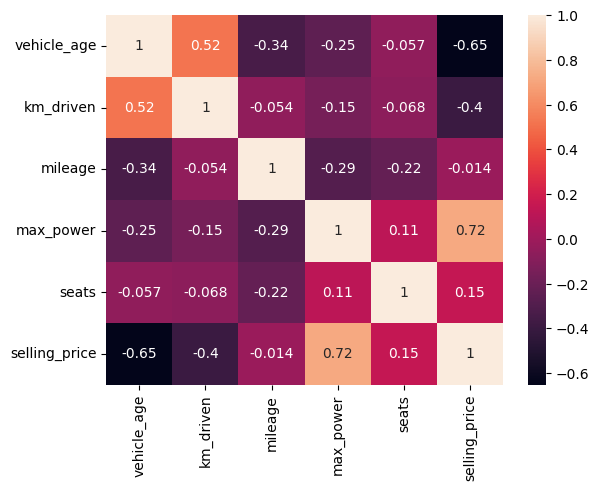

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [21]:
# Features and target
X = df[[ 'vehicle_age', 'max_power']]
#X=df.drop('selling_price',axis=1)
y = df['selling_price']
X

,vehicle_age,max_power
0,9,46.30
1,9,67.10
2,8,67.10
3,3,67.04
4,2,118.35
...,...,...
2114,6,67.04
2115,7,47.30
2116,4,67.00
2117,4,47.30


In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [23]:
ElasticNet_param={
        'alpha': [0.1, 1.0, 10.0],
        'l1_ratio': [0.2, 0.5, 0.8],
        'fit_intercept': [True, False]
    }

In linear regression, the fit_intercept parameter controls whether or not the intercept (c) should be included in the model.

fit_intercept=True (Default):

This means the model will learn an intercept value that shifts the regression line vertically to best fit the data.

fit_intercept=False:

The model assumes that the data passes through the origin (0,0), so the intercept
c is set to 0.

The regression line will be forced to pass through the origin, meaning the relationship between the dependent and independent variables is assumed to have no inherent bias or shift.




This might be useful if you know for sure that the relationship between variables should pass through the origin.

In [24]:
grid_search = GridSearchCV(estimator=ElasticNet(), param_grid=ElasticNet_param, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_models = grid_search.best_estimator_
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1.0, 'fit_intercept': True, 'l1_ratio': 0.2}
-57313.890061545055


neg_mean_absolute_error is essentially the negative of MAE. It is used in specific contexts, particularly in scikit-learn's model selection and evaluation functions.

Usage:

In scikit-learn's model selection (e.g., cross_val_score or GridSearchCV), metrics are often optimized by minimizing or maximizing them. Since MAE is a metric to be minimized, its negative is used to transform it into a maximizable value for compatibility with scikit-learn's optimization routines.

This means when using neg_mean_absolute_error, higher (less negative) values are better, aligning with the principle that lower MAE values indicate better performance.

In [25]:
grid_search.cv_results_

{'mean_fit_time': array([0.00396042, 0.00240321, 0.00241995, 0.00246468, 0.00255599,
        0.00363851, 0.00442543, 0.00365233, 0.00245662, 0.00280418,
        0.00247226, 0.00267968, 0.00265288, 0.00245833, 0.00247188,
        0.00236354, 0.00238838, 0.00235858]),
 'std_fit_time': array([2.96409753e-03, 1.02807617e-04, 9.17104267e-05, 1.23557203e-04,
        2.79353762e-04, 7.32432849e-04, 1.45021898e-04, 9.22036538e-04,
        4.52011445e-05, 4.41369309e-04, 1.59924501e-04, 5.76703024e-04,
        2.02091947e-04, 1.04848565e-04, 6.88582245e-05, 4.96372595e-05,
        6.59427345e-05, 5.82980181e-05]),
 'mean_score_time': array([0.00169945, 0.00153885, 0.0014977 , 0.00147715, 0.00157132,
        0.00189786, 0.00180402, 0.00171356, 0.00150747, 0.00188422,
        0.00154219, 0.00149875, 0.00147963, 0.00151649, 0.00146904,
        0.00153127, 0.00152402, 0.00149255]),
 'std_score_time': array([4.08871083e-04, 8.81045657e-05, 5.94681894e-05, 3.11906180e-05,
        8.48134478e-05, 2.42

In [26]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003960,0.002964,0.001699,0.000409,0.1,True,0.2,"{'alpha': 0.1, 'fit_intercept': True, 'l1_rati...",-59441.249160,-58843.477256,-55081.662017,-56334.939161,-57197.617048,-57379.788928,1599.892918,4
1,0.002403,0.000103,0.001539,0.000088,0.1,True,0.5,"{'alpha': 0.1, 'fit_intercept': True, 'l1_rati...",-59443.806383,-58865.807259,-55099.144883,-56324.628677,-57189.871499,-57384.651740,1601.191391,5
2,0.002420,0.000092,0.001498,0.000059,0.1,True,0.8,"{'alpha': 0.1, 'fit_intercept': True, 'l1_rati...",-59446.918730,-58888.230397,-55116.705910,-56314.249843,-57182.067688,-57389.634514,1602.744433,6
3,0.002465,0.000124,0.001477,0.000031,0.1,False,0.2,"{'alpha': 0.1, 'fit_intercept': False, 'l1_rat...",-60025.888902,-59831.318494,-55560.104075,-57058.481447,-58745.644465,-58244.287476,1706.171526,13
4,0.002556,0.000279,0.001571,0.000085,0.1,False,0.5,"{'alpha': 0.1, 'fit_intercept': False, 'l1_rat...",-60041.432040,-59866.258994,-55585.127330,-57057.107748,-58753.514452,-58260.688113,1708.743151,14
